## DIGIRISE INFOLABS INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## ML AND DATASCIENCE INTERNSHIP

### PROBLEM STATEMENT : FAKE NEWS DETECTION

Develop an machine learning algorithm or model that can accurately classify news articles as either real or fake based on a set of input features. This may involve using natural language processing (NLP) techniques to analyze the text of the article, as well as other features stored in the dataset. Use the dataset given below. 
FAKE NEWS DETECTION 2 PROJECT Dataset link : https://www.kaggle.com/datasets/jainpooja/fake-news-detection

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/True.csv
/kaggle/input/fake-news-detection/Fake.csv


#### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import nltk
import re
import string
import pickle
import gc
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
import wordcloud
from wordcloud import WordCloud

In [4]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [5]:
#importing stopwords list
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### IMPORTING DATASETS

In [6]:
true_news = pd.read_csv('/kaggle/input/fake-news-detection/True.csv')
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_news = pd.read_csv('/kaggle/input/fake-news-detection/Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### ADDING THE STATUS OF FAKE OR REAL

In [8]:
true_news['is_fake'] = 0
true_news.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [9]:
fake_news['is_fake'] = 1
fake_news.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


#### MERGING DATASETS

In [10]:
all_news = pd.concat([true_news, fake_news], axis = 0)

In [11]:
all_news.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [12]:
all_news.tail()

,title,text,subject,date,is_fake
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


#### REDUNDANT DATA REMOVAL

In [13]:
working_data = all_news.drop(['title','subject','date'], axis = 1)
working_data.head()

,text,is_fake
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


#### EXPLORATORY ANALYSIS

In [14]:
working_data.describe()

,is_fake
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [15]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   is_fake  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


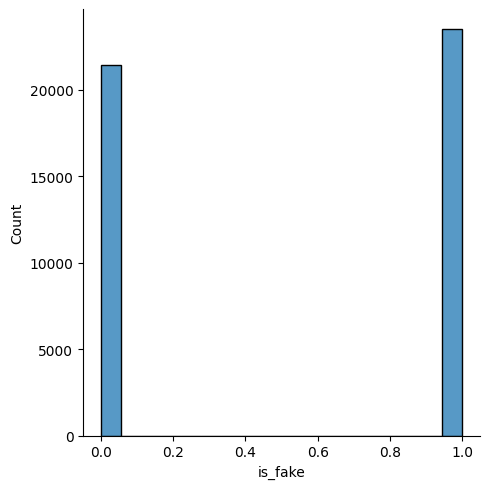

In [16]:
sns.displot(working_data['is_fake'])

In [17]:
working_data.shape

(44898, 2)

#### DATA PREPROCESSING

In [18]:
def preprocess_data (input):
    
    #stopword removal
    input = " ".join([word for word in str(input).split() if word not in stop_words])
    
    #converting to lower case
    input = input.lower()
        
    #punction removal
    input = input.translate(str.maketrans("", "", string.punctuation))
                        
    #repeated character removal
    input = re.sub(r'(.)\1+', r'\1', input)
                        
    #numerical character removal
    input = re.sub('[0-9]+', '', input)
    
    #removing user@ references and #
    input = re.sub(r'\@\w+|\#w+', "", input)
                     
    #tokenization
    tokens = RegexpTokenizer(r'\w+')
    filtered_list = tokens.tokenize(input)
    
    #stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in filtered_list]
      
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos = 'a') for w in stemmed_words]
    
    #output
    return " ".join(lemma_words)

In [19]:
working_data['text'] = working_data['text'].apply(lambda x : preprocess_data(x))
gc.collect()

0

In [20]:
working_data.head()

,text,is_fake
0,washington reuter the head conserv republican ...,0
1,washington reuter transgend peopl alow first t...,0
2,washington reuter the special counsel investig...,0
3,washington reuter trump campaign advis georg p...,0
4,seatlewashington reuter presid donald trump ca...,0


In [21]:
working_data.tail()

,text,is_fake
23476,st centuri wire say as wire report early wek u...,1
23477,st centuri wire say it familiar theme whenev d...,1
23478,patrick heningsen st centuri wirerememb obama ...,1
23479,st centuri wire say al jazera america go histo...,1
23480,st centuri wire say as wire predict new year l...,1


#### WORD VISUALIZATION

##### TRUE NEWS WORD VISUALIZATION

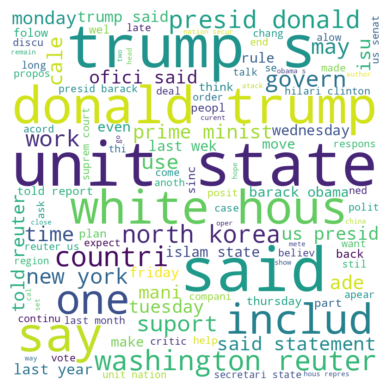

2118

In [22]:
text_true = " ".join(text for text in working_data['text'][working_data['is_fake']==0])
true_wordcloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 1000, min_font_size = 15).generate(text_true)
plt.imshow(true_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
true_wordcloud.to_file('/kaggle/working/true_words.png')
gc.collect()

##### FAKE NEWS WORD VISUALIZATION

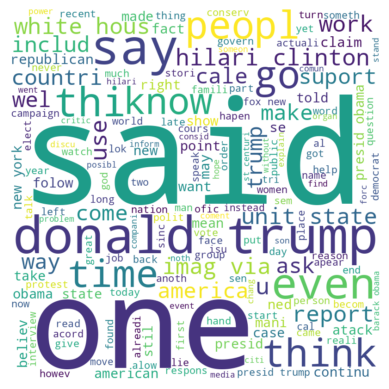

2126

In [23]:
text_fake = " ".join(text for text in working_data['text'][working_data['is_fake']==1])
fake_wordcloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 1000, min_font_size = 15).generate(text_fake)
plt.imshow(fake_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
fake_wordcloud.to_file('/kaggle/working/fake_words.png')
gc.collect()

#### PROCESSED NEWS VECTORIZATION

In [24]:
verctorizer = TfidfVectorizer()
X = (working_data['text'])
Y = (working_data['is_fake'])
X = verctorizer.fit_transform(X)
gc.collect()

0

#### HYPERPARAMETER TUNING

In [25]:
random_state_limit = 100
accuracies = []

for i in range(random_state_limit + 1):
    x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.15,shuffle = True, stratify = Y, random_state = i)
    x_train = x_train.toarray()
    x_test = x_test.toarray()
    test_model = LogisticRegression(max_iter = 100, solver = 'lbfgs')
    test_model.fit(x_train, y_train)
    y_predict = test_model.predict(x_test)
    score = accuracy_score(y_test,y_predict)*100
    accuracies.append(score)
    print('Trial run '+str(i+1)+ ' completed : Accuracy Score =  '+str(accuracy_score(y_test,y_predict)))
    gc.collect()
    
accuracies = np.array(accuracies)
gc.collect()

Trial run 1 completed : Accuracy Score =  0.985894580549369
Trial run 2 completed : Accuracy Score =  0.9867854491462509
Trial run 3 completed : Accuracy Score =  0.9873793615441723
Trial run 4 completed : Accuracy Score =  0.9861915367483296
Trial run 5 completed : Accuracy Score =  0.9876763177431329
Trial run 6 completed : Accuracy Score =  0.9870824053452116
Trial run 7 completed : Accuracy Score =  0.98634001484781
Trial run 8 completed : Accuracy Score =  0.9854491462509279
Trial run 9 completed : Accuracy Score =  0.9866369710467706
Trial run 10 completed : Accuracy Score =  0.9867854491462509
Trial run 11 completed : Accuracy Score =  0.98634001484781
Trial run 12 completed : Accuracy Score =  0.9851521900519673
Trial run 13 completed : Accuracy Score =  0.985894580549369
Trial run 14 completed : Accuracy Score =  0.9876763177431329
Trial run 15 completed : Accuracy Score =  0.9855976243504083
Trial run 16 completed : Accuracy Score =  0.9823311061618412
Trial run 17 completed 

0

In [26]:
best_score = np.max(accuracies)
best_random_state = np.argmax(accuracies)
print('Best Score : ' + str(best_score))
print('Best Random State : ' + str(best_random_state))
gc.collect()

Best Score : 98.96065330363771
Best Random State : 75


0

#### TRAIN TEST SPLIT

In [27]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.15,shuffle = True, stratify = Y, random_state = int(best_random_state))

In [28]:
x_train = x_train.toarray()
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y_train

16774    0
18698    1
2703     0
12560    1
2808     1
        ..
18953    1
11984    0
1469     1
10879    1
11874    0
Name: is_fake, Length: 38163, dtype: int64

In [30]:
x_test = x_test.toarray()
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_test

2938     0
8515     1
9829     0
9485     0
19917    1
        ..
2217     1
13599    1
14073    1
7214     0
15272    0
Name: is_fake, Length: 6735, dtype: int64

#### MODEL IMPLEMENTATION

In [32]:
fake_news_detector = LogisticRegression(max_iter = 100, solver = 'lbfgs')
fake_news_detector.fit(x_train, y_train)

LogisticRegression()

#### MODEL EVALUATION

In [33]:
y_predict = fake_news_detector.predict(x_test)

In [34]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('Confusion Matrix :')
cm=confusion_matrix(y_test,y_predict)
print(cm)
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict))*100)
print('\n')
print('The test ROC AUC score is :')
print(roc_auc_score(y_test,y_predict))

The classification test results are : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3213
           1       0.99      0.99      0.99      3522

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735

Confusion Matrix :
[[3185   28]
 [  42 3480]]


The test accuracy percentage is :
98.96065330363771


The test precision percentage is :
99.2018244013683


The test recall percentage is :
98.80749574105621


The test f1 percentage is :
99.00426742532005


The test ROC AUC score is :
0.9896801802303354


#### SAVING THE FILES

In [35]:
pickle.dump(verctorizer, open('/kaggle/working/vectorizer.pkl','wb'))
pickle.dump(fake_news_detector, open('/kaggle/working/fake_news_detector.pkl','wb'))